# Visualization of Image Compression 


## Singular Value Decomposition (SVD) - Dimensionality Reduction Single Image (Numpy)

SVD is a powerful mathematical tool often used in image processing to reduce the amount of data while still maintaining an acceptable image quality. This technique effectively reduces the dimensionality of an image, making it possible to store it using fewer values. 

* An image can be represented as a 2D matrix of pixel values.
* For grayscale images, the pixel intensities range from 0 (black) to 255 (white).
* For RGB images, we have three matrices (one for each color channel: Red, Green, Blue).
* Assume a grayscale image for simplicity.



In [36]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color

## Read the Original Image

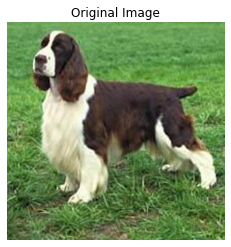

In [37]:
# Load the image
image = io.imread('./imagenette/imagenette2-320/train/n02102040/n02102040_3514.JPEG')
# Show the original image
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()



## Read the Image and Convert it to a Matrix

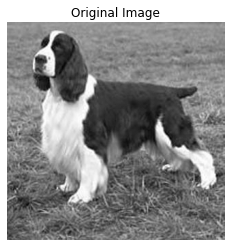

In [39]:


# Load the image
image = io.imread('./imagenette/imagenette2-320/train/n02102040/n02102040_3514.JPEG')


# Convert the image to grayscale
grayscale_image = color.rgb2gray(image)

# Show the original image
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Get the image matrix
A = np.array(grayscale_image)

## Apply Singular Value Decomposition (SVD)
* Singular Value Decomposition breaks down the matrix $A$ into three other matrices $U$, $Σ$ (Sigma), and $V^T$.
* The formula is: $ A = U \Sigma V^T $
    *	$U$ and $V^T$ are orthogonal matrices.
    *	$Σ$ is a diagonal matrix containing singular values in descending order.



In [40]:
# Perform Singular Value Decomposition
U, S, VT = np.linalg.svd(A, full_matrices=False)

# S is returned as a 1D array, convert it into a diagonal matrix
Sigma = np.diag(S)


## Reduce Dimensionality by Truncating Singular Values

The goal of compression is to reduce the amount of data.
To do this, we can keep only the top k singular values in $Σ$, and truncate the corresponding columns in U and rows in $V^T$.
Choosing a smaller $k$ reduces the image size while retaining the most significant features.

$k$ is the number of singular values you want to keep. A larger k gives higher quality but less compression, whereas a smaller $k$ gives more compression but lower quality.

Reconstruct the image by multiplying the truncated $U$, $Σ$, and $V^T$.
This results in an approximation of the original image but using fewer components.

Storage Calculation:
*	The original image matrix A is of size $m \times n$.
*	After SVD, the storage required is:
    *	$U_k$: $m \times k$
    *	$Σ_k$: $k \times k$
    *	$V^T_k$: $k \times n$
*	The total number of values needed to store the compressed image is $mk+k2+kn$, which is much smaller compared to mnmnmn when k is small.




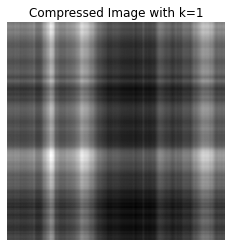

In [50]:
# Choose the number of singular values to keep
k = 1  # adjust k based on the desired level of compression

# Truncate U, Sigma, and VT to keep only the first k components
U_k = U[:, :k]
Sigma_k = Sigma[:k, :k]
VT_k = VT[:k, :]

# Reconstruct the compressed image
A_k = np.dot(U_k, np.dot(Sigma_k, VT_k))

# Plot the reconstructed image
plt.imshow(A_k, cmap='gray')
plt.title(f'Compressed Image with k={k}')
plt.axis('off')
plt.show()


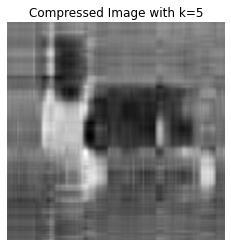

In [51]:
# Choose the number of singular values to keep
k = 5  #  adjust k based on the desired level of compression

# Truncate U, Sigma, and VT to keep only the first k components
U_k = U[:, :k]
Sigma_k = Sigma[:k, :k]
VT_k = VT[:k, :]

# Reconstruct the compressed image
A_k = np.dot(U_k, np.dot(Sigma_k, VT_k))
# Plot the reconstructed image
plt.imshow(A_k, cmap='gray')
plt.title(f'Compressed Image with k={k}')
plt.axis('off')
plt.show()


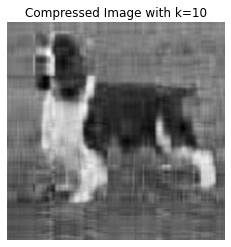

In [52]:
# Choose the number of singular values to keep
k = 10  #  adjust k based on the desired level of compression

# Truncate U, Sigma, and VT to keep only the first k components
U_k = U[:, :k]
Sigma_k = Sigma[:k, :k]
VT_k = VT[:k, :]

# Reconstruct the compressed image
A_k = np.dot(U_k, np.dot(Sigma_k, VT_k))
# Plot the reconstructed image
plt.imshow(A_k, cmap='gray')
plt.title(f'Compressed Image with k={k}')
plt.axis('off')
plt.show()


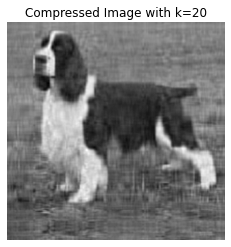

In [53]:
# Choose the number of singular values to keep
k = 20  #  adjust k based on the desired level of compression

# Truncate U, Sigma, and VT to keep only the first k components
U_k = U[:, :k]
Sigma_k = Sigma[:k, :k]
VT_k = VT[:k, :]

# Reconstruct the compressed image
A_k = np.dot(U_k, np.dot(Sigma_k, VT_k))
# Plot the reconstructed image
plt.imshow(A_k, cmap='gray')
plt.title(f'Compressed Image with k={k}')
plt.axis('off')
plt.show()
